In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'../data/NepalLatestAQI.csv')
dataset.head()

,date,station,latitude,longitude,aqi,pm2_5,pm10,no2,so2,o3,temperature_C,relative_humidity_%,notes
0,2024-01-01,Kathmandu,27.7172,85.3240,162,75.9,161.5,18.5,8.0,16.2,20.9,65.2,NaN
1,2024-01-01,Lalitpur,27.6648,85.3188,157,66.9,105.9,18.2,4.2,34.1,28.8,76.2,NaN
2,2024-01-01,Bhaktapur,27.6714,85.4270,166,84.8,182.9,16.4,7.1,26.7,20.3,60.9,NaN
3,2024-01-01,Pokhara,28.2096,83.9856,79,25.5,47.8,2.0,1.0,31.7,23.0,47.9,NaN
4,2024-01-01,Biratnagar,26.4525,87.2718,146,53.8,86.3,17.2,1.9,34.5,23.9,54.1,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 9840 non-null   object 
 1   station              9840 non-null   object 
 2   latitude             9840 non-null   float64
 3   longitude            9840 non-null   float64
 4   aqi                  9840 non-null   int64  
 5   pm2_5                9840 non-null   float64
 6   pm10                 9840 non-null   float64
 7   no2                  9840 non-null   float64
 8   so2                  9840 non-null   float64
 9   o3                   9840 non-null   float64
 10  temperature_C        9840 non-null   float64
 11  relative_humidity_%  9840 non-null   float64
 12  notes                79 non-null     object 
dtypes: float64(9), int64(1), object(3)
memory usage: 999.5+ KB


In [4]:
dataset = dataset.drop(columns="notes")

In [5]:
dataset.iloc[:, 4:].describe()

,aqi,pm2_5,pm10,no2,so2,o3,temperature_C,relative_humidity_%
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,98.507724,34.610203,69.379736,14.154380,3.745447,40.985793,21.263211,55.461240
std,46.093600,18.904674,40.546733,7.935624,1.884605,14.794235,7.787653,14.842697
min,4.000000,1.000000,1.000000,2.000000,1.000000,3.800000,1.100000,10.000000
25%,70.000000,21.200000,40.800000,8.000000,2.300000,29.875000,14.500000,45.000000
50%,93.000000,32.000000,63.100000,13.400000,3.600000,38.600000,21.900000,54.500000
75%,124.250000,44.800000,90.300000,19.700000,5.000000,50.600000,27.800000,65.300000
max,500.000000,185.500000,450.500000,43.400000,11.000000,98.900000,40.000000,100.000000


In [6]:
numeric_columns = ['aqi', 'pm2_5', 'pm10', 'no2', 'so2', 'o3', 'temperature_C',	'relative_humidity_%']

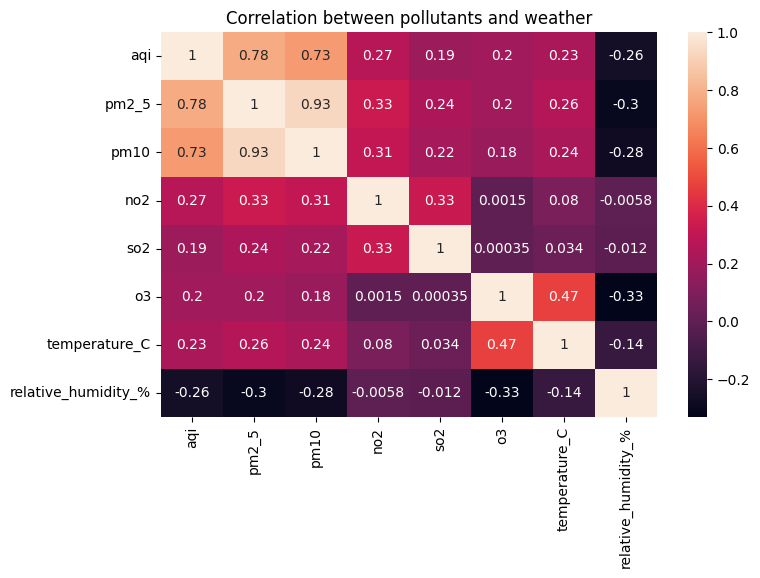

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[numeric_columns].corr(), annot=True)
plt.title("Correlation between pollutants and weather")
plt.show()

In [8]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['Year'] = dataset['date'].dt.year
dataset['Month'] = dataset['date'].dt.month_name()
dataset['Day'] = dataset['date'].dt.day
dataset['dayofweek'] = dataset['date'].dt.day_name()

In [9]:
def get_season(month):
    if month in ['November', 'December', 'January']:
        return "Winter"
    elif month in ['February', 'March', 'April']:
        return "Pre-Monsoon"
    elif month in ['May', 'June', 'July', 'August']:
        return "Monsoon"
    else:
        return "Festivals"

In [10]:
dataset['Season'] = dataset['Month'].apply(get_season)

In [11]:
monthly_avg_pollutants = dataset.resample('ME', on='date')[['pm2_5','pm10','aqi']].mean()

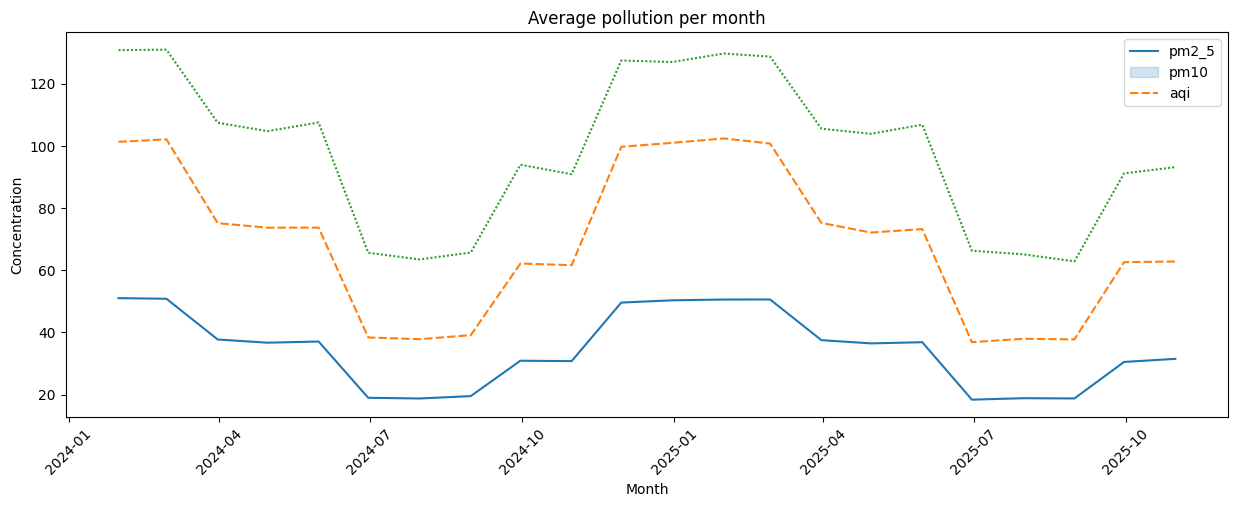

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(monthly_avg_pollutants)
plt.title("Average pollution per month")
plt.xlabel("Month")
plt.ylabel("Concentration")
plt.legend(monthly_avg_pollutants.columns)
plt.xticks(rotation=45)
plt.show()

In [13]:
monthly_avg_weather = dataset.resample('ME', on='date')[['temperature_C', 'relative_humidity_%']].mean()

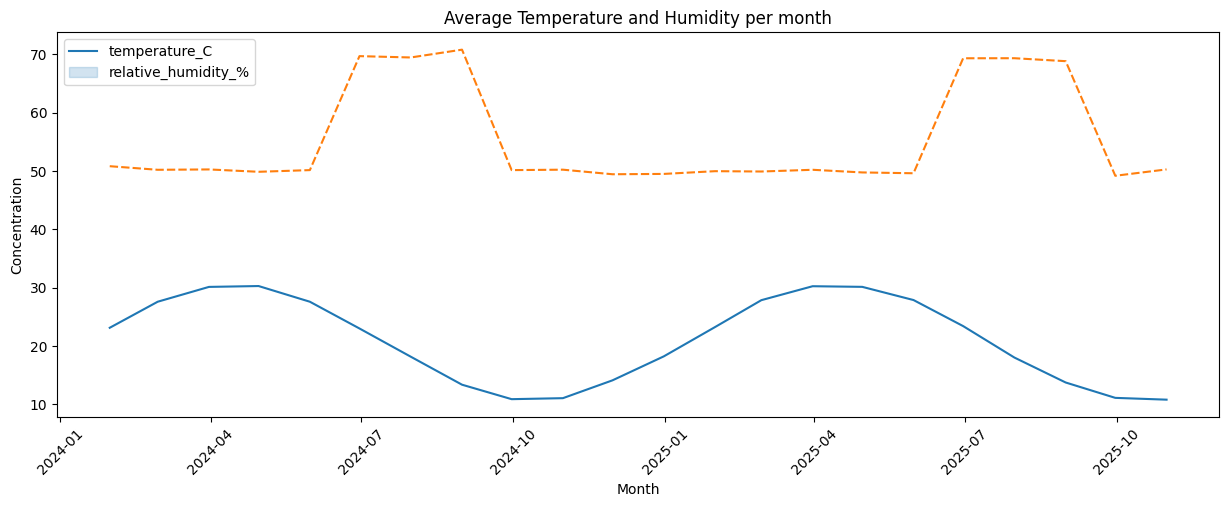

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(monthly_avg_weather)
plt.title("Average Temperature and Humidity per month")
plt.xlabel("Month")
plt.ylabel("Concentration")
plt.legend(monthly_avg_weather.columns)
plt.xticks(rotation=45)
plt.show()

In [15]:
seasonal_avg = dataset.groupby('Season')[['pm2_5', 'pm10', 'aqi']].mean()

In [16]:
season_order = ['Winter', 'Pre-Monsoon', 'Monsoon', 'Festivals']
seasonal_avg = seasonal_avg.reset_index()
seasonal_avg['Season'] = pd.Categorical(seasonal_avg['Season'], categories=season_order, ordered=True)
seasonal_avg = seasonal_avg.sort_values('Season')

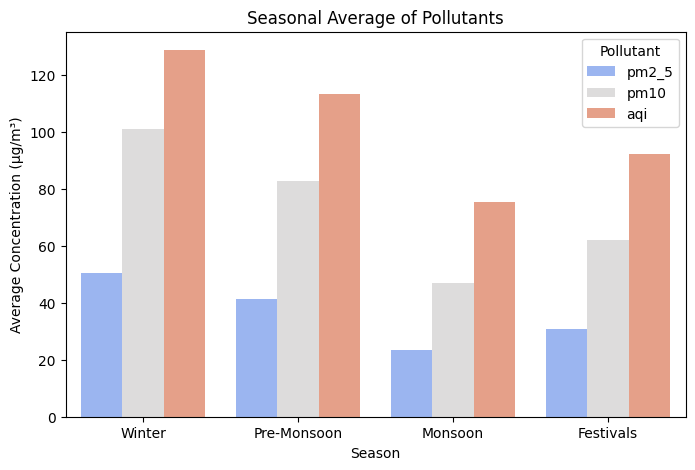

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=seasonal_avg.melt(id_vars='Season', value_vars=['pm2_5', 'pm10', 'aqi']),
    x='Season',
    y='value',
    hue='variable',
    palette='coolwarm'
)
plt.title("Seasonal Average of Pollutants")
plt.xlabel("Season")
plt.ylabel("Average Concentration (µg/m³)")
plt.legend(title="Pollutant")
plt.show()

In [18]:
daily_avg_pollutants = dataset.groupby('date')[['pm2_5', 'pm10', 'aqi']].mean()

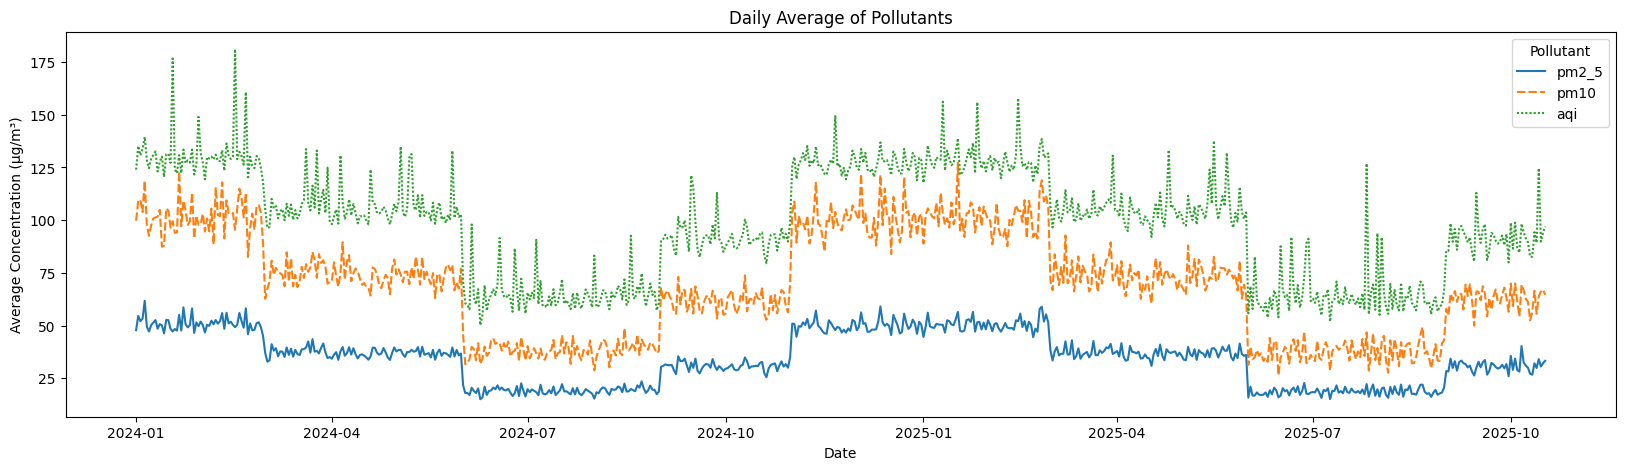

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(daily_avg_pollutants)
plt.title("Daily Average of Pollutants")
plt.xlabel("Date")
plt.ylabel("Average Concentration (µg/m³)")
plt.legend(title="Pollutant")
plt.show()

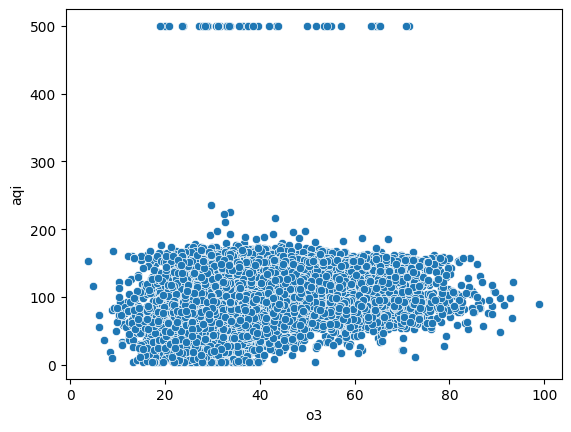

In [26]:
sns.scatterplot(x="o3", y="aqi", data=dataset)
plt.show()

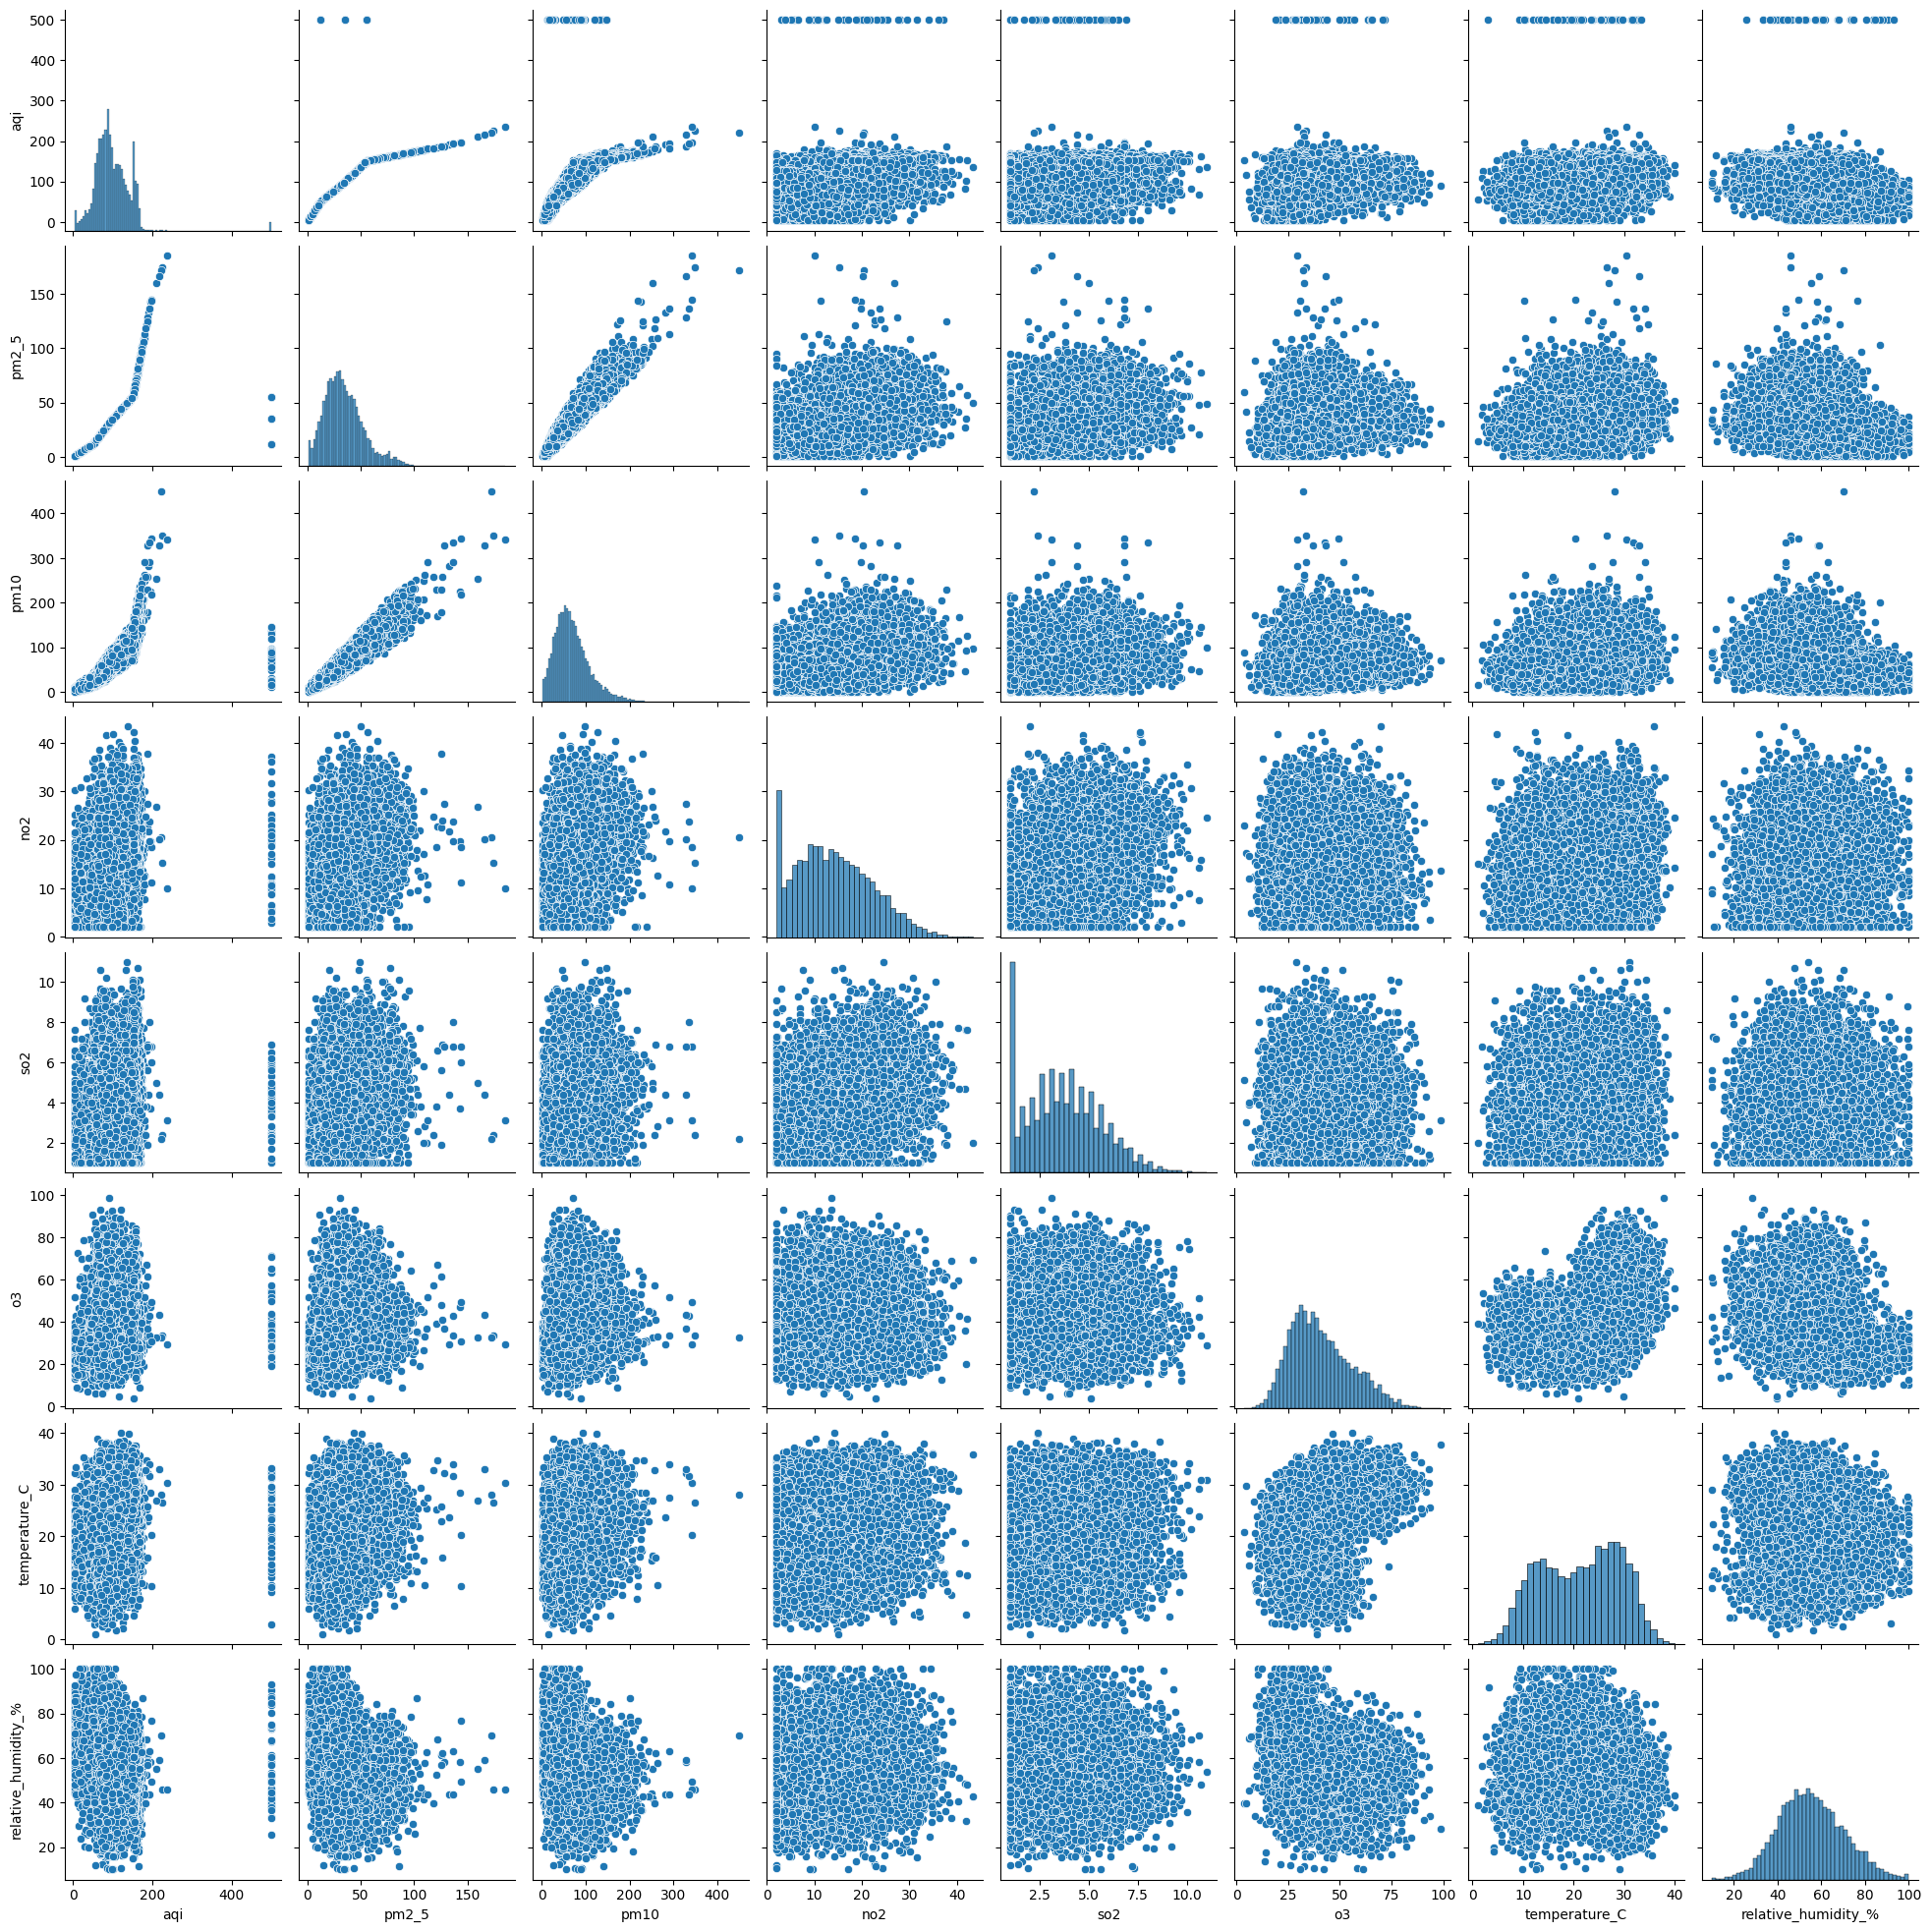

In [28]:
sns.pairplot(dataset[numeric_columns])
plt.show()